In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/Evaluate/FGD')

from embedding_space_evaluator import EmbeddingSpaceEvaluator
from train_AE import make_tensor

In [2]:
n_frames = 32
epochs = np.linspace(0,150,4, dtype= int)
case_number = 13

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# AE model
ae_path = '../src/Evaluate/FGD/model_checkpoint_upperbody_32.bin'
fgd_evaluator = EmbeddingSpaceEvaluator(ae_path, n_frames, device)

def run_fgd(fgd_evaluator, gt_data, test_data):
    fgd_evaluator.reset()

    fgd_evaluator.push_real_samples(test_data)
    fgd_evaluator.push_generated_samples(gt_data)
    fgd_on_feat = fgd_evaluator.get_fgd(use_feat_space=True)
    fdg_on_raw = fgd_evaluator.get_fgd(use_feat_space=False)
    return fgd_on_feat, fdg_on_raw

/lyceum/kjl1a21/Filestone/Individual_Project/2nd_week_3rd_week/LSTM_GAN/evaluate_model/embedding_space_evaluator.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = 

Epoch 0
FGD on Feature Space: 77.33906256084322
FGD on Raw Data Space: 1120.9962973595289
Epoch 50
FGD on Feature Space: 88.0350351333507
FGD on Raw Data Space: 635.514399628918
Epoch 100
FGD on Feature Space: 29.347374478612466
FGD on Raw Data Space: 335.84007940343395
Epoch 150
FGD on Feature Space: 20.598156732221838
FGD on Raw Data Space: 269.18514312412094


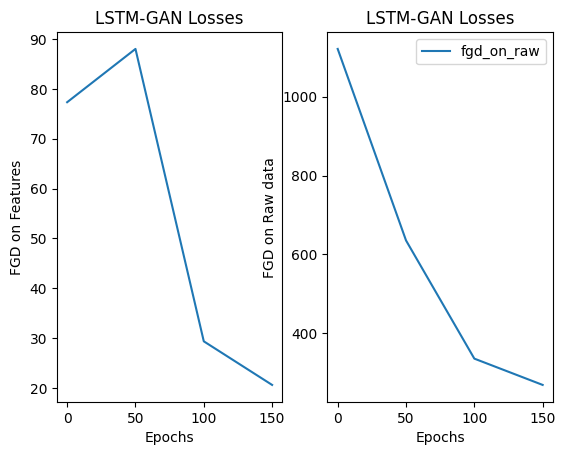

In [21]:
fgd_on_feat_array = []
fgd_on_raw_array = []

for epoch in epochs:

    # Convert to PyTorch tensors and move to the correct device
    generated_output = make_tensor(f'../Hyperparameter_Tuning_and_Ablation_Study/Test_and_Generated_Data/Case_{case_number}/Generated_Data/generated_output_epoch_{epoch}.npy').to(device)
    test_action_batch = make_tensor(f'../Hyperparameter_Tuning_and_Ablation_Study/Test_and_Generated_Data/Case_{case_number}/Test_Data/test_action_batch_epoch_{epoch}.npy').to(device)

    # Compute FGD
    fgd_on_feat, fgd_on_raw = run_fgd(fgd_evaluator, generated_output, test_action_batch)

    if fgd_on_raw >= 20000:
        fgd_on_raw = 20000

    # Print or save the results
    print(f'Epoch {epoch}')
    print(f"FGD on Feature Space: {fgd_on_feat}")
    print(f"FGD on Raw Data Space: {fgd_on_raw}")

    fgd_on_feat_array.append(fgd_on_feat)
    fgd_on_raw_array.append(fgd_on_raw)

# Visualize losses
fig, axes = plt.subplots(1,2)
axes[0].plot(epochs, fgd_on_feat_array, label='fgd_on_feat')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('FGD on Features')
axes[0].set_title('LSTM-GAN Losses')
axes[1].plot(epochs, fgd_on_raw_array, label='fgd_on_raw')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('FGD on Raw data')
axes[1].set_title('LSTM-GAN Losses')
plt.legend()
plt.savefig(f"../Hyperparameter_Tuning_and_Ablation_Study/Test_and_Generated_Data/Case_{case_number}/lstm_gan_FGD_losses.png")
plt.show()

In [10]:
# Convert to PyTorch tensors and move to the correct device
fake_motion = make_tensor(f'../Hyperparameter_Tuning_and_Ablation_Study/Model/Case_20/LSTM_Test_Motion_Model_Epoch_150.npy').to(device)
real_motion = make_tensor(f'../Data/test_action.npy').to(device)

fgd_on_feat, fgd_on_raw = run_fgd(fgd_evaluator, fake_motion, real_motion)

print(f"FGD on Feature Space: {fgd_on_feat}")
print(f"FGD on Raw Data Space: {fgd_on_raw}")

FGD on Feature Space: 21.958717319430605
FGD on Raw Data Space: 288.7818883776549
